## 1. Import Library

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import keras 
import tensorflow

from tensorflow.keras.preprocessing.text import Tokenizer
from keras.models import Sequential
from keras.layers import Conv1D, GlobalMaxPooling1D
from keras.layers import Embedding, Flatten, Dense, SimpleRNN
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

import warnings
warnings.filterwarnings('ignore')

## 2. Data Loading

In [2]:
path = 'D:\DS_ML_Project\Emotion_Classifier\emotion_train.txt'
raw = pd.read_csv(path, sep=';')
raw.columns = ['Text', 'Emotions']
raw.head()

,Text,Emotions
0,i can go from feeling so hopeless to so damned...,sadness
1,im grabbing a minute to post i feel greedy wrong,anger
2,i am ever feeling nostalgic about the fireplac...,love
3,i am feeling grouchy,anger
4,ive been feeling a little burdened lately wasn...,sadness


In [3]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15999 entries, 0 to 15998
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Text      15999 non-null  object
 1   Emotions  15999 non-null  object
dtypes: object(2)
memory usage: 250.1+ KB


In [4]:
raw['Emotions'].unique()

array(['sadness', 'anger', 'love', 'surprise', 'fear', 'joy'],
      dtype=object)

## 3. Data Preprocessing

In [5]:
# Data preprocessing
texts = raw['Text'].tolist()
labels = raw['Emotions'].tolist()

# tokenize the text data
tokenizer = Tokenizer()
tokenizer.fit_on_texts(texts)

In [6]:
sequences = tokenizer.texts_to_sequences(texts)
max_length = max([len(seq) for seq in sequences])
padded_sequences = pad_sequences(sequences, maxlen=max_length)

In [7]:
# encode the string labels to integers
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(labels)

In [8]:
ohe_labels = keras.utils.to_categorical(labels)

## 4. Training Multiple Models

### Train-Test Split

In [9]:
# Train-Test Split Dataset
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, ohe_labels, test_size=0.2, random_state=100)

### 1. Sequential

In [10]:
# mendefinisikan model & training
model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index) + 1,
                    output_dim=128, input_length=max_length))
model.add(Flatten())
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=len(ohe_labels[0]), activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test))


Epoch 1/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 29s 117ms/step - accuracy: 0.3569 - loss: 1.5711 - val_accuracy: 0.5766 - val_loss: 1.1131
Epoch 2/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 22s 111ms/step - accuracy: 0.7487 - loss: 0.7380 - val_accuracy: 0.7819 - val_loss: 0.6317
Epoch 3/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 26s 132ms/step - accuracy: 0.9679 - loss: 0.1407 - val_accuracy: 0.8112 - val_loss: 0.5768
Epoch 4/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 28s 140ms/step - accuracy: 0.9925 - loss: 0.0363 - val_accuracy: 0.8153 - val_loss: 0.6013
Epoch 5/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 29s 144ms/step - accuracy: 0.9966 - loss: 0.0190 - val_accuracy: 0.8194 - val_loss: 0.6237
Epoch 6/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 39s 134ms/step - accuracy: 0.9970 - loss: 0.0143 - val_accuracy: 0.8128 - val_loss: 0.6790
Epoch 7/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 27s 137ms/step - accuracy: 0.9974 - loss: 0.0133 - val_accuracy: 0.8131 - val_loss: 0.6873
Epoch 8/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 27s 136ms/step - accuracy: 0.9977 - loss: 0

100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step
              precision    recall  f1-score   support

       anger       0.83      0.71      0.76       401
        fear       0.86      0.88      0.87       960
         joy       0.69      0.64      0.67       103
        love       0.80      0.90      0.85      1061
     sadness       0.83      0.71      0.76       416
    surprise       0.71      0.61      0.66       259

    accuracy                           0.81      3200
   macro avg       0.79      0.74      0.76      3200
weighted avg       0.81      0.81      0.81      3200



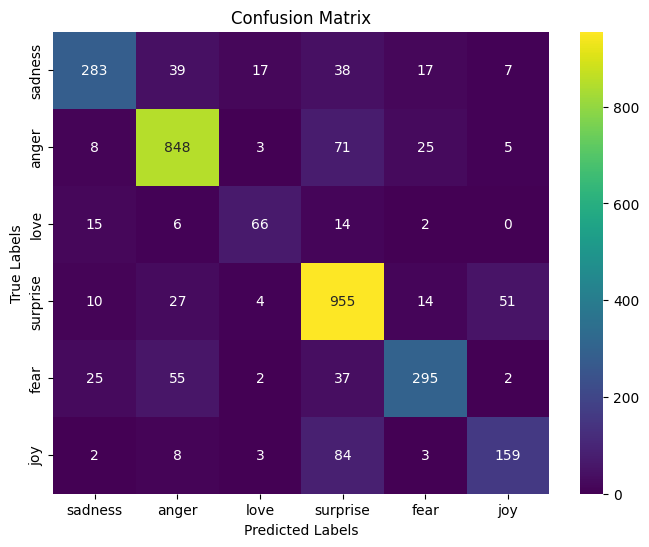

Most showed label is:  love


In [11]:
# mapping number label to emotions label
emotions = ['sadness', 'anger', 'love', 'surprise', 'fear', 'joy']

# evaluate the Sequential model
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# mapping nilai prediksi dan nilai sebenarnya
y_pred_emotions = [emotions[i] for i in y_pred]
y_true_emotions = [emotions[i] for i in y_true]

# display classification report
print(classification_report(y_true_emotions, y_pred_emotions))

# plot confusion matrix
conf_matrix_sequential = confusion_matrix(y_true_emotions, y_pred_emotions)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_sequential, annot=True, 
            xticklabels=emotions, yticklabels=emotions, 
            cmap='viridis', fmt='d')

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# menampilkan label yang terbanyak
counter_seq = Counter(y_pred_emotions)
most_common_label = counter_seq.most_common(1)[0][0]
print('Most showed label is: ', most_common_label)


### 2. Convolutional Neural Network (CNN)

In [12]:
# create CNN Model
cnn_model = Sequential()
cnn_model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=128, input_length=max_length))
cnn_model.add(Conv1D(64, 3, activation='relu'))

cnn_model.add(GlobalMaxPooling1D())

cnn_model.add(Dense(units=128, activation='relu'))
cnn_model.add(Dense(units=len(ohe_labels[0]), activation='softmax'))

cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
cnn_model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test))

Epoch 1/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 26s 103ms/step - accuracy: 0.3921 - loss: 1.5358 - val_accuracy: 0.8678 - val_loss: 0.3895
Epoch 2/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 22s 112ms/step - accuracy: 0.8988 - loss: 0.2921 - val_accuracy: 0.9128 - val_loss: 0.2078
Epoch 3/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 26s 131ms/step - accuracy: 0.9506 - loss: 0.1254 - val_accuracy: 0.9222 - val_loss: 0.1901
Epoch 4/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 25s 124ms/step - accuracy: 0.9763 - loss: 0.0624 - val_accuracy: 0.9209 - val_loss: 0.2044
Epoch 5/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 25s 125ms/step - accuracy: 0.9871 - loss: 0.0364 - val_accuracy: 0.9141 - val_loss: 0.2248
Epoch 6/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 25s 123ms/step - accuracy: 0.9917 - loss: 0.0262 - val_accuracy: 0.9134 - val_loss: 0.2372
Epoch 7/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 25s 123ms/step - accuracy: 0.9946 - loss: 0.0194 - val_accuracy: 0.9119 - val_loss: 0.2569
Epoch 8/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 26s 128ms/step - accuracy: 0.9955 - loss: 0

100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step
              precision    recall  f1-score   support

       anger       0.87      0.89      0.88       401
        fear       0.95      0.95      0.95       960
         joy       0.75      0.75      0.75       103
        love       0.96      0.91      0.93      1061
     sadness       0.93      0.90      0.91       416
    surprise       0.73      0.89      0.80       259

    accuracy                           0.91      3200
   macro avg       0.86      0.88      0.87      3200
weighted avg       0.92      0.91      0.91      3200



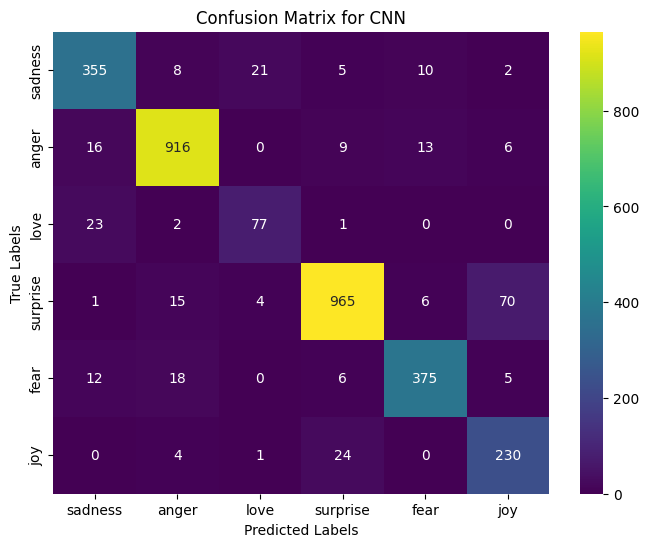

In [13]:
# Evaluate CNN Model
y_pred_cnn = cnn_model.predict(X_test)
y_pred_cnn_classes = np.argmax(y_pred_cnn, axis=1)
y_true_cnn = np.argmax(y_test, axis=1)

# Mapping Predicted and True Value/Label
y_pred_cnn_emotions = [emotions[i] for i in y_pred_cnn_classes]
y_true_cnn_emotions = [emotions[i] for i in y_true_cnn]

# Display classification report for CNN
print(classification_report(y_true_cnn_emotions, y_pred_cnn_emotions))

# Plot confusion matrix for CNN
conf_matrix_cnn = confusion_matrix(y_true_cnn_emotions, y_pred_cnn_emotions)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_cnn, annot=True, fmt='d', cmap='viridis', xticklabels=emotions, yticklabels=emotions)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for CNN')
plt.show()

### 3. Recurrent Neural Network

In [14]:
# Create RNN Model
rnn_model = Sequential()
rnn_model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, 
                        output_dim=128, input_length=max_length))
rnn_model.add(SimpleRNN(64, activation='relu'))

rnn_model.add(Dense(units=128, activation='relu'))
rnn_model.add(Dense(units=len(ohe_labels[0]), activation='softmax'))

rnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
rnn_model.fit(X_train,
              y_train,
              epochs=10,
              batch_size=64,
              validation_data=(X_test, y_test))

Epoch 1/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 35s 130ms/step - accuracy: 0.3662 - loss: 1.5504 - val_accuracy: 0.6184 - val_loss: 1.0096
Epoch 2/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 40s 122ms/step - accuracy: 0.7078 - loss: 0.7435 - val_accuracy: 0.7594 - val_loss: 0.5975
Epoch 3/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 42s 124ms/step - accuracy: 0.8462 - loss: 0.4115 - val_accuracy: 0.8353 - val_loss: 0.4877
Epoch 4/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 25s 125ms/step - accuracy: 0.9271 - loss: 0.2292 - val_accuracy: 0.8612 - val_loss: 0.4382
Epoch 5/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 26s 128ms/step - accuracy: 0.9635 - loss: 0.1241 - val_accuracy: 0.8831 - val_loss: 0.4052
Epoch 6/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 25s 126ms/step - accuracy: 0.9732 - loss: 0.0915 - val_accuracy: 0.8656 - val_loss: 0.6416
Epoch 7/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 36s 101ms/step - accuracy: 0.9678 - loss: 0.1148 - val_accuracy: 0.8797 - val_loss: 0.5264
Epoch 8/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 20s 100ms/step - accuracy: 0.9874 - loss: 0

100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step
              precision    recall  f1-score   support

       anger       0.89      0.76      0.82       401
        fear       0.93      0.95      0.94       960
         joy       0.49      0.75      0.59       103
        love       0.91      0.92      0.92      1061
     sadness       0.90      0.87      0.88       416
    surprise       0.78      0.74      0.76       259

    accuracy                           0.88      3200
   macro avg       0.82      0.83      0.82      3200
weighted avg       0.89      0.88      0.88      3200



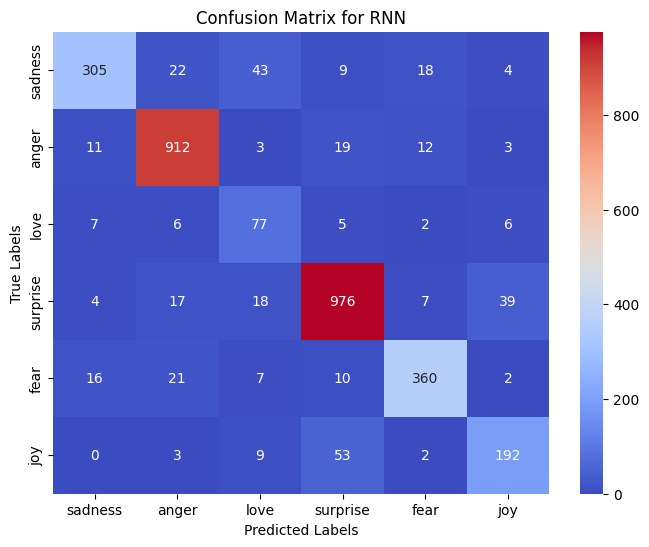

In [15]:
# Evaluate RNN Model
y_pred_rnn = rnn_model.predict(X_test)
y_pred_rnn_classes = np.argmax(y_pred_rnn, axis=1)
y_true_rnn = np.argmax(y_test, axis=1)

# Mapping predicted and true value/label
y_pred_rnn_emotions = [emotions[i] for i in y_pred_rnn_classes]
y_true_rnn_emotions = [emotions[i] for i in y_true_rnn]

# Display classification report for RNN
print(classification_report(y_true_rnn_emotions, y_pred_rnn_emotions))

# Plot confusion matrix for RNN
conf_matrix_rnn = confusion_matrix(y_true_rnn_emotions, y_pred_rnn_emotions)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rnn, annot=True, fmt='d', cmap='coolwarm', xticklabels=emotions, yticklabels=emotions)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for RNN')
plt.show()

## 5. Save Model

In [16]:
best_model = cnn_model
# Save the best model
best_model.save('best_model.h5')